Pra rodar as células usa o comando SHIFT + ENTER

O objetivo dessa primeira célula é criar permissão pra utilizar o drive. 
Quando rodar a célula será gerado um link. 
Basta clicar no link e fazer login com sua conta do google.
Copia o texto que aparecer e cola no na caixa que aparecer depois dessa célula. ENTER

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from collections import OrderedDict, Counter
import os
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Nessa parte escolhemos a data que será utilizada. Fica a vontade pra mudar.

In [32]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Entrega_v1/Análise_Mídia/mediaframe_export.csv', encoding = 'utf-8')

df = df[(df['publication_date'] > '2013-05-01 00:00:00') & (df['publication_date'] < '2013-07-31 09:00:00')]
df = df.dropna()

###Palavras mais frequentes

In [33]:
def word_transform(words):
    words = words.split()
    total = [x.lower() for x in words]
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '-', '@','"','...','dilma','*']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

In [34]:
df['text'] = df['text'].apply(word_transform)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


In [35]:
import operator
lista = df['text'].values.tolist()

flat_list = reduce(operator.concat, lista)
flat_list = flat_list.split()

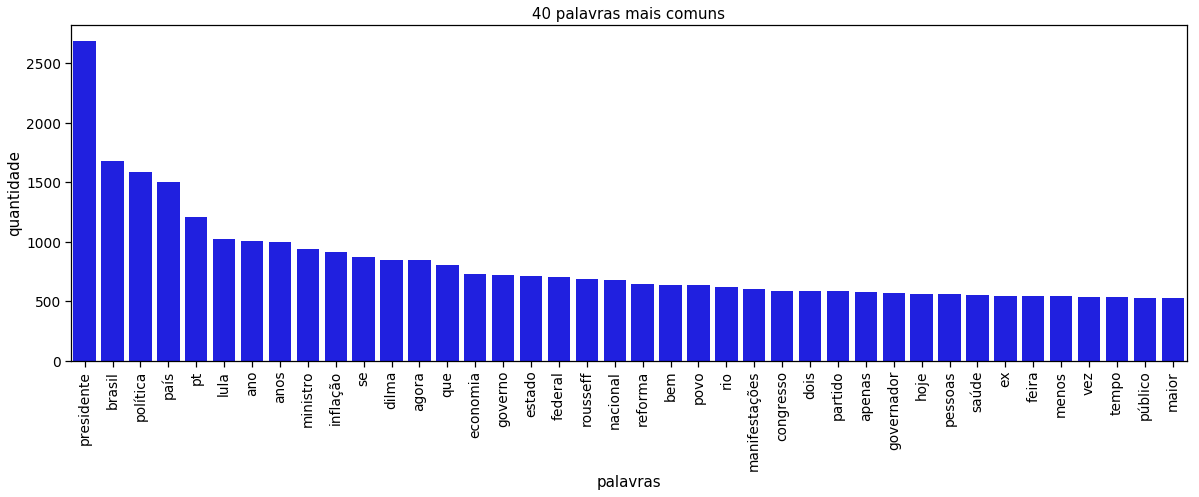

In [36]:
def plot_n_most_common_words(count_data, count_vectorizer, n):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(20, 10/1.6180))
    plt.subplot(title='{} palavras mais comuns'.format(n))
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, color = 'blue')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('palavras')
    plt.ylabel('quantidade')
    plt.show()

count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(flat_list)
                                               
plot_n_most_common_words(count_data, count_vectorizer,40)

### Gráfico de centralidade e co-ocorrência

In [37]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Entrega_v1/Análise_Mídia/mediaframe_export.csv', encoding = 'utf-8')

df = df[(df['publication_date'] > '2013-05-01 00:00:00') & (df['publication_date'] < '2013-07-31 09:00:00')]
df = df.dropna()

In [38]:
df_centralidade = df[['text']]

In [39]:
df_centralidade['text'] = df_centralidade['text'].apply(word_transform)

texto_sem_tags = ' '.join(df_centralidade['text'].tolist())


l_sem_stopwords = texto_sem_tags.split()
t_sem_stopwords = u' '.join(l_sem_stopwords)

lista_tweets = df_centralidade['text'].tolist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
def polariza_counter(dicionario, df1, df2):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.items():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        elif p in df2.index:
            polaridades.append(df2.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)

    return polaridade, ausentes

freq_words = Counter(l_sem_stopwords)

w_items = freq_words.items()
w_items.sort(key = lambda wc: wc[1])

datapath = '/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/'
oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'
sentilex1 = 'SentiLex-PT02/SentiLex-lem-PT02.txt'
sentilex2 = 'SentiLex-PT02/SentiLex-flex-PT02.txt'

df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'],  inplace=True)
df_o = df_o.set_index(u'palavra')

df_s1 = pd.read_csv(os.path.join(datapath,sentilex1), header=None, encoding='utf-8', delimiter='.', names=[u'palavra',u'polaridade'])
conserta_pol1 = lambda x: int(x.split(';')[2].split('=')[1])
df_s1.polaridade = df_s1.polaridade.apply(conserta_pol1)
df_s1.drop_duplicates(subset=[u'palavra'], inplace=True)
df_s1 = df_s1.set_index(u'palavra')

In [41]:
def all_pairs(items):
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
 
    wpairs = all_pairs(words)

    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [42]:
n_nodes = 12
popular = w_items[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = co_occurrences(lista_tweets, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
wgraph = list(nx.connected_component_subgraphs(wgraph))[0]
centrality = nx.eigenvector_centrality_numpy(wgraph)
c = centrality.items()
c.sort(key=lambda x:x[1], reverse=True)

In [44]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    
    m = arr.min()
    M = arr.max()
 
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
 
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

 
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

  
    sizes = []
    degrees = []
    for n, d in wgraph.nodes(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,
                           alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width,
                           edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels, 
                                 font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):

    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

Nessa parte escolhemos qual palavra será o centro do Grafo. Pode escolher outra se for do interesse.

Graph visualization for query:


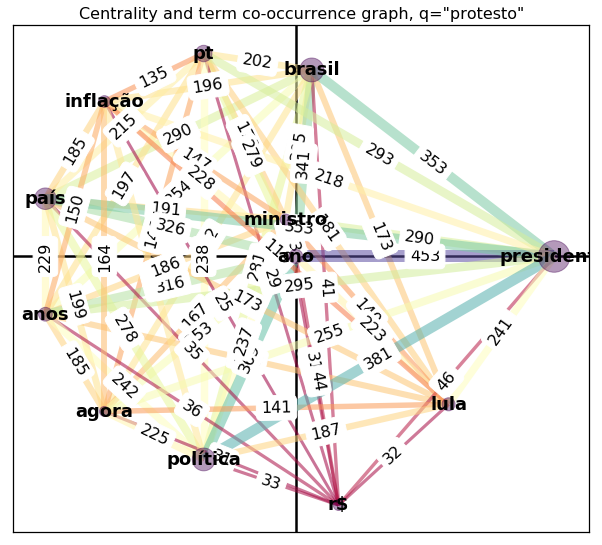

In [45]:
query = 'protesto'
print "Graph visualization for query:"
plot_graph(wgraph, centrality_layout(wgraph, centrality), 
           plt.figure(figsize=(8,8)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

### n-grams e dispersão lexical

In [46]:
q = u'dilma'

In [47]:
tokens = word_tokenize(t_sem_stopwords) 
text = nltk.Text(tokens)
text.concordance(q, width=130, lines=10)

Displaying 10 of 847 matches:
ra mostram transformou protesto protesto avaliavam auxiliares dilma pacote jovens sendo costurado pacote juventude ideia inicial 
rso político além inclusão social tão destacada governos lula dilma primeiro parágrafo falcão afirma movimentos `` colocam ordem 
ro educação aloizio mercadante credenciado consultor político dilma risco embate petistas manifestantes principal preocupação dir
rio partido dê munição adversários transformem protestos atos dilma que momento alvo central ala petista acha partido direito ir 
pt tentar impor manifestação apartidária apenas expor partido dilma chamamento rui falcão atacado pesadamente jovens rejeitaram p
 críticas fizeram seguir orientação dirigente petista `` eles dilma pt dilma ir rua apanharmos '' deputado domingos dutra pt-ma v
 fizeram seguir orientação dirigente petista `` eles dilma pt dilma ir rua apanharmos '' deputado domingos dutra pt-ma vicente si
gens poderão captar influência dessa mobilização popularidad

In [48]:
max_items = 50
freq_min_b = 10
freq_min_t = 6

In [49]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print a, b

penchiari luiz_penchiari
juchem cjuchem
alati eugeniojosealati
pacini benetazzos
twiaschor rtwiaschor
igor gielow
cartões corporativos
laércio zannini
gerson camarotti
zannini arsene
cláusula pétrea
erdei gzero
juliano opegapulhas
per capita
ress erdei
cesare battisti
turíbio liberatto
tarso genro
jaques wagner
ferraz ronferraz
oziel gabriel
editoria arte/folhapress
zardetto fzardetto
liberatto turibioliberatto
ah-ah-ah oh-oh-oh
uriel villas
mané garrincha
marcus juliano
rosemary noronha
ben bernanke
flavio marcus
afernandes standyball
laert pinto
nusbaum lnusbaum
miriam belchior
vicente limongi
gobbi edgardgobbi
carneiro carneirojc
edgard gobbi
panayotis poulis
zipmailcombr osasco
claudio juchem
bel tunes
humberto schuwartz
schuwartz soares
soares hs-soares
minuto segundos
del bel
tunes carmen_tunes
poor 's


In [50]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print a, b, c

asdrubal gobenati asdrubalgobenati
tófoli kezerle rogeriokezerle
silvano corrêa scorrea
girão lessa paulinhogirao
mustafa baruki mustafa-baruki
tereza murray terezamurray
myrian macedo myrianmacedo
agnes eckermann agneseck
carmela tassi chaves
tassi chaves tassichaves
alvaro salvi alvarosalvi
cgtb csp conlutas
ivan bertazzo ivanbertazzo
sebastião paschoal s_paschoal
negrão borgonovi marionegraoborgonovi
rogério tófoli kezerle
esperavam ampliasse repasses
tania tavares taniatma
vagner ricciardi vbricci
alessandro lucchesi timtimlucchesi
laércio zannini arsene
ress erdei gzero
marcus juliano opegapulhas
turíbio liberatto turibioliberatto
bastos lucchesi cblucchesi
claudio juchem cjuchem
flavio marcus juliano
retroescavadeiras prefeituras paranaenses
limongi netto limonginetto
schuwartz soares hs-soares
paranaenses ponta grossa
jeovah ferreira jeovahbf
empregados desempregados caged
peres frança josefranciscof
eckermann passos sepassos
caio augusto bastos
terena oziel gabriel
frança leme 

In [51]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
df_ngrams = pd.DataFrame(xgrams_counter.items(), columns = [u'n-gramas',u'Frequência'])
df_ngrams = df_ngrams.sort_index(by=u'Frequência', ascending=False)
df_ngrams.set_index([u'n-gramas'], inplace=True)
df_ngrams[0:40]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Frequência
n-gramas,
"(luiz, inácio, lula, silva)",98
"(ministro, fazenda, guido, mantega)",86
"(ex-presidente, luiz, inácio, lula)",56
"(governador, pernambuco, eduardo, campos)",46
"(supremo, tribunal, federal, stf)",43
"(beatriz, campos, beatrizcampos, @)",42
"(campos, beatrizcampos, @, uolcombr)",42
"(henrique, eduardo, alves, pmdb-rn)",41
"(produto, interno, bruto, pib)",41


Nessa célula escolhemos as palavras que vão ser utilizadas na dispersão lexical

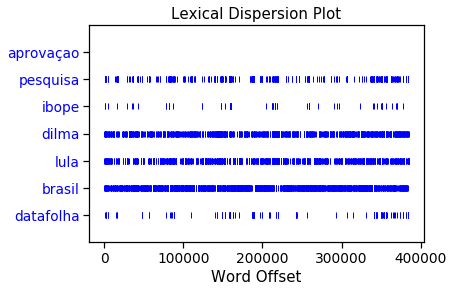

In [52]:
text.dispersion_plot([u'aprovaçao', 
                      u'pesquisa',
                      u'ibope',
                      u'dilma',
                      u'lula',
                      u'brasil',
                      u'datafolha',
                      ])

Frases mais significativas dos tweets

In [53]:
manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                          'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                          'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                          'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
        'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
        'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '@','"','...']
stop_words = stopwords.words('portuguese')
for i in manual_list_stop_words:
    stop_words.append(i)

In [54]:
def score_sentences(sentences, important_words):
    
    CLUSTER_THRESHOLD = 5  
    scores = []
    sentence_idx = -1
   
    for s in [word_tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        
        for w in important_words:
            try:
              
                word_idx.append(s.index(w))
            except ValueError, e: # w not in this particular sentence
                pass
        word_idx.sort()
     
        if len(word_idx)== 0: continue
        
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
   
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [55]:
def summarize(txt):
    TOP_SENTENCES = 10  
    N = 100  
   
    sentences = [s for s in word_tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in nltk.tokenize.word_tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in stop_words][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)

    avg = np.mean([s[1] for s in scored_sentences])
    std = np.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]
 
    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
   
    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

In [56]:
sumarios = summarize(texto_sem_tags)
sumarios['top_n_summary'] = set(sumarios['top_n_summary'])
sumarios['mean_scored_summary'] = set(sumarios['mean_scored_summary'])

print(u'palavras mais importantes(1):\n')
for s in sumarios['top_n_summary']:
    print(u'{}\n'.format(s))
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


palavras mais importantes(1):

rapidamente

clínico-geral

linha

parágrafo

prazo

